In [1]:
%load_ext watermark
%watermark -a 'Christian Schuhegger' -u -d -v -p numpy,scipy,pandas,matplotlib,h5py,mxnet,xarray

Christian Schuhegger 
last updated: 2019-03-19 

CPython 3.6.8
IPython 7.3.0

numpy 1.15.4
scipy 1.2.1
pandas 0.24.1
matplotlib 3.0.2
h5py 2.9.0
mxnet 1.3.1
xarray 0.11.3


In [2]:
import os,sys
sys.path.append(os.path.realpath('.'))
sys.path.append(os.path.realpath('../../'))

In [3]:
%matplotlib inline
import numpy as np, scipy.stats as stats, pandas as pd, xarray as xr, matplotlib.pyplot as plt, seaborn as sns
import logging
# import sklearn, sklearn.pipeline, sklearn.model_selection, sklearn.preprocessing
# import logging, time, datetime
# from settings import s, e
import mxnet as mx
# import tqdm

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=1000)
np.set_printoptions(suppress=True)
np.core.arrayprint._line_width = 180

sns.set()

In [4]:
from IPython.display import display, HTML

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        if type(df) == np.ndarray:
            df = pd.DataFrame(df)
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline"')
    # print(html_str)
    display_html(html_str,raw=True)

CSS = """
.output {
    flex-direction: row;
}
"""

def display_graphs_side_by_side(*args):
    html_str='<table><tr>'
    for g in args:
        html_str += '<td>'
        html_str += g._repr_svg_()
        html_str += '</td>'
    html_str += '</tr></table>'
    display_html(html_str,raw=True)
    

display(HTML("<style>.container { width:70% !important; }</style>"))

In [5]:
#from .model.model_base_mx import VGGPlusModel
from model.model_base_mx import VGG20190317Model

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s:%(name)s:%(levelname)s: %(message)s')
log = logging.getLogger('std')

In [7]:
model = VGG20190317Model(log)

2019-03-19 07:25:11,638:std:DEBUG: setup
2019-03-19 07:25:11,639:std:DEBUG: setup
2019-03-19 07:25:11,671:std:INFO: number of gpus: 1, ctx: gpu(0)
2019-03-19 07:25:11,672:model_base_mx:DEBUG: model_ctx    : gpu(0)
2019-03-19 07:25:11,673:model_base_mx:DEBUG: VGGPlusBlock start
2019-03-19 07:25:11,673:model_base_mx:DEBUG: VGGPlusBlock._make_features
2019-03-19 07:25:11,674:model_base_mx:DEBUG: l: Conv2D(None -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2019-03-19 07:25:11,675:model_base_mx:DEBUG: l: Conv2D(None -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2019-03-19 07:25:11,676:model_base_mx:DEBUG: l: Conv2D(None -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2019-03-19 07:25:11,677:model_base_mx:DEBUG: l: Conv2D(None -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2019-03-19 07:25:11,678:model_base_mx:DEBUG: VGGPlusBlock._make_features
2019-03-19 07:25:11,679:model_base_mx:DEBUG: l: Conv2D(None -> 64, kernel_size=(3, 3), stride=(1, 1), pa

In [8]:
x1 = mx.sym.var('data0')
x2 = mx.sym.var('data1')
sym = model.model(x1,x2)
mx.visualization.print_summary(sym,  shape={'data0':(593552, 22), 'data1': (593552, 7, 11, 11)}, line_length=280)

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Layer (type)                                                                                                               Output Shape                                            Param #                     Previous Layer                                                           
data0(null)                                                                                                                22                                                      0                                                                                                    
_____________________________________________________________________________________________________________________________________________________________

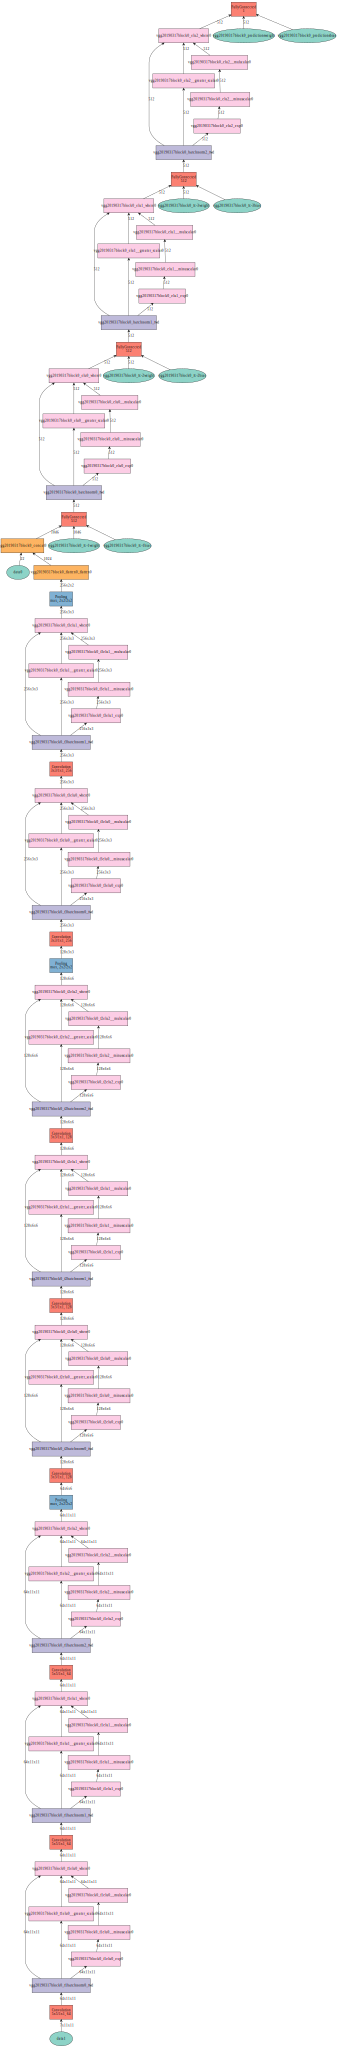

In [9]:
digraph = mx.viz.plot_network(sym, shape={'data0':(593552, 22), 'data1': (593552, 7, 11, 11)}, node_attrs={"fixedsize":"false"})
#digraph.view() # will create 'plot.gv.pdf'
digraph